# 1 Menyambungkan dengan penyimpanan Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Memberikan akses ke google drive

# 2 Mengimpor pustaka/modul python yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np

import re
import string

import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import plotly.io as pio
pio.renderers.default = 'colab'
from wordcloud import WordCloud,STOPWORDS

from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

import tensorflow as tf
from tensorflow import keras
from keras import layers

Mengimport library yang dibutuhkan untuk analisis

# 3 Data Understanding

### 3.1 Menyiapkan path dataset pada penyimpanan drive serta menampilkan overview dataset Movie menggunakan library pandas

In [ ]:
movies_meta_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MachineLearningTerapan/Machine-Learning-Terapan-2/movies.csv')

movies_meta_data

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


Mengimport file yang akan dianalisis lebih lanjut. Terdapat 9.742 baris dengan 3 kolom

### 3.2 Menampilkan keterangan jumlah/panjang data unique daftar film dan data pengguna/user

In [ ]:
print('Banyak Data movies ID: ', len(movies_meta_data.movieId.unique()))

Banyak Data movies ID:  9742


Menampilkan jumlah data yang ada dengan 9742 movie

### 3.3 Menampilkan keterangan kolom dataset

In [ ]:
movies_meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


Memuat informasi dataframe movies_meta_data

### 3.4 Menampilkan Daftar Genre pada dataset

In [ ]:
print('Jenis-jenis Genre pada dataset: ', movies_meta_data.genres.unique())

Jenis-jenis Genre pada dataset:  ['Adventure|Animation|Children|Comedy|Fantasy'
 'Adventure|Children|Fantasy' 'Comedy|Romance' 'Comedy|Drama|Romance'
 'Comedy' 'Action|Crime|Thriller' 'Adventure|Children' 'Action'
 'Action|Adventure|Thriller' 'Comedy|Horror'
 'Adventure|Animation|Children' 'Drama' 'Action|Adventure|Romance'
 'Crime|Drama' 'Drama|Romance' 'Action|Comedy|Crime|Drama|Thriller'
 'Comedy|Crime|Thriller' 'Crime|Drama|Horror|Mystery|Thriller'
 'Drama|Sci-Fi' 'Children|Drama' 'Adventure|Drama|Fantasy|Mystery|Sci-Fi'
 'Mystery|Sci-Fi|Thriller' 'Children|Comedy' 'Drama|War'
 'Action|Crime|Drama' 'Action|Adventure|Fantasy' 'Comedy|Drama|Thriller'
 'Mystery|Thriller' 'Animation|Children|Drama|Musical|Romance'
 'Crime|Mystery|Thriller' 'Adventure|Drama' 'Drama|Thriller'
 'Comedy|Crime' 'Action|Sci-Fi|Thriller' 'Action|Comedy|Horror|Thriller'
 'Comedy|Drama' 'Documentary' 'Action|Crime|Drama|Thriller'
 'Crime|Drama|Romance' 'Action|Adventure|Drama' 'Action|Thriller'
 'Drama|Horror|T

Menampilkan selutuh genre movie pada data

### 3.5 Menghitung besar/panjang data genre secara unique

In [ ]:
print('Jumlah data genre: ', len(movies_meta_data.genres.unique()))

Jumlah data genre:  951


Menghitung jumlah data genre data pada file movie.csv secara uniqe. Hasil menunjukkan bahwa terdapat 951 data yang uniqe

### 3.6 Memuat deskripsi setiap kolom dataframe untuk perhitungan count, rata-rata, minimal value dan maximal value, dll

In [ ]:
movies_meta_data.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


from matplotlib import pyplot as plt
_df_0['movieId'].plot(kind='hist', bins=20, title='movieId')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['movieId'].plot(kind='line', figsize=(8, 4), title='movieId')
plt.gca().spines[['top', 'right']].set_visible(False)

Memuat deskripsi setiap kolom dataframe

In [ ]:
movies_meta_data.isnull().sum()

,0
movieId,0
title,0
genres,0


Menghitung jumlah data kosong pada setiap kolom

### 3.7 Memuat dataset ke dalam variable baru

In [ ]:
# Memuat dataset ke dalam variable baru
movie = movies_meta_data.movieId.unique()

# Mengurutkan data dan menghapus data yang sama
movie = np.sort(np.unique(movie))

print('Jumlah seluruh data movie berdasarkan movieId: ', len(movie))

Jumlah seluruh data movie berdasarkan movieId:  9742


Memuat dataset ke dalam variable baru dan Mengurutkan data dan menghapus data yang sama

In [ ]:
movie_info = pd.concat([movies_meta_data])

movie_info

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


### 3.8 Menampilkan jumlah kata paling banyak yg muncul dalam kolom genre

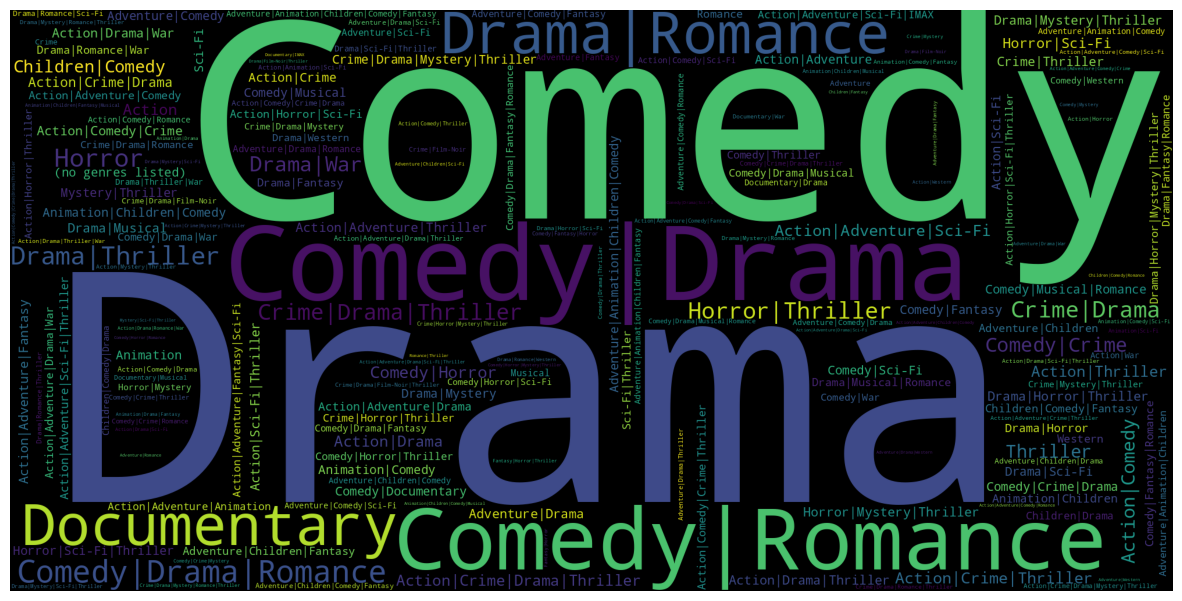

In [ ]:
word_could_dict = Counter(movies_meta_data['genres'].tolist())
wordcloud = WordCloud(width = 2000, height = 1000).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Menampilkan kata dengan frekuensi terbanyak pada kolom genre. Data menunjukkan kata "Drama" dan "Comedy" memiliki jumlah kata paling banyak

# 4 Data Preparation

### 4.1 Memilih kolom berdasarkan data yang dibutuhkan untuk melakukan content based learning berdasarkan genre yaitu judul dan genre

In [ ]:
judul_movie = movies_meta_data['title'].tolist()
genre_movie = movies_meta_data['genres'].tolist()

print(len(judul_movie))
print(len(genre_movie))

9742
9742


Memilih kolom berdasarkan data, terlihat masing-masing menampilkan 9742 data

### 4.2 Membuat data menjadi dalam bentuk dataframe sehingga mudah untuk dipersiapkan

In [ ]:
data = pd.DataFrame({
    'judul': judul_movie,
    'genre': genre_movie
})

data

,judul,genre
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy
...,...,...
9737,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,Flint (2017),Drama
9740,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   judul   9742 non-null   object
 1   genre   9742 non-null   object
dtypes: object(2)
memory usage: 152.3+ KB


Melihat informasi kolom pada data, terlihat data type yaitu object tanpa mission value.

### 4.3 Memuat banyak data dari setiap unique value berdasarkan genre

In [ ]:
value_genre = pd.DataFrame(data['genre'].value_counts().reset_index().values, columns = ['genre', 'count'])
print(len(value_genre))
pd.options.display.max_colwidth = 500
value_genre

951


,genre,count
0,Drama,1053
1,Comedy,946
2,Comedy|Drama,435
3,Comedy|Romance,363
4,Drama|Romance,349
...,...,...
946,Children|Drama|Musical,1
947,Adventure|Drama|Horror|Mystery|Thriller,1
948,Adventure|Children|Comedy|Fantasy|Mystery,1
949,Adventure|Animation|Children|Western,1


Data menunjukkan 951 data uniqe dengan dua kolom

In [ ]:
# membuat data string tanda strip '-' pada variable data dihapus
data = data[data.genre != '-']

Melihat kembali Jenis-Jenis Genre yang terdapat pada data

In [ ]:
data.genre.unique()

array(['Adventure|Animation|Children|Comedy|Fantasy',
       'Adventure|Children|Fantasy', 'Comedy|Romance',
       'Comedy|Drama|Romance', 'Comedy', 'Action|Crime|Thriller',
       'Adventure|Children', 'Action', 'Action|Adventure|Thriller',
       'Comedy|Horror', 'Adventure|Animation|Children', 'Drama',
       'Action|Adventure|Romance', 'Crime|Drama', 'Drama|Romance',
       'Action|Comedy|Crime|Drama|Thriller', 'Comedy|Crime|Thriller',
       'Crime|Drama|Horror|Mystery|Thriller', 'Drama|Sci-Fi',
       'Children|Drama', 'Adventure|Drama|Fantasy|Mystery|Sci-Fi',
       'Mystery|Sci-Fi|Thriller', 'Children|Comedy', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure|Fantasy',
       'Comedy|Drama|Thriller', 'Mystery|Thriller',
       'Animation|Children|Drama|Musical|Romance',
       'Crime|Mystery|Thriller', 'Adventure|Drama', 'Drama|Thriller',
       'Comedy|Crime', 'Action|Sci-Fi|Thriller',
       'Action|Comedy|Horror|Thriller', 'Comedy|Drama', 'Documentary',
       'Ac

Melakukan drop pada judul film yg double, dan berhasil menghapus beberapa judul

In [ ]:
data = data.drop_duplicates('judul')
len(data)

9737

### 4.4 Melakukan indeks ulang pada data agar penomoran dilakukan berurutan

In [ ]:
data.reset_index()
data

,judul,genre
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy
...,...,...
9737,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,Flint (2017),Drama
9740,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


### 4.5 Memasukkan nilai data masing-masing kolom ke dalam variabel baru

In [ ]:
judul = data['judul'].tolist()
genre = data['genre'].tolist()

print(len(judul))
print(len(genre))

9737
9737


In [ ]:
data = pd.DataFrame({
    'judul': judul,
    'genre': genre
})
data

,judul,genre
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy
...,...,...
9732,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9733,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9734,Flint (2017),Drama
9735,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


Mengecek ulang data yg dimasukkan ke dalam variable baru

## 4.6 Proses Data


### 4.6.1 Membangun sistem rekomendasi berdasarkan genre yang ada pada setiap movies.

In [ ]:
# Inisialisasi CountVectorizer
tf = CountVectorizer()

# Melakukan perhitungan idf pada data genre
tf.fit(genre)

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['action', 'adventure', 'animation', 'children', 'comedy', 'crime',
       'documentary', 'drama', 'fantasy', 'fi', 'film', 'genres',
       'horror', 'imax', 'listed', 'musical', 'mystery', 'no', 'noir',
       'romance', 'sci', 'thriller', 'war', 'western'], dtype=object)

### 4.6.2 Melakukan Proses fit dan melihat jumlah ukuran matrix

In [ ]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(genre)

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(9737, 24)

### 4.6.3 Mengubah vektor ke dalam bentuk matrix

In [ ]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0, 1, 1, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [1, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

### 4.6.4 Melihat Daftar jumlah film berdasarkan genre dan melihat korelasi nya yg diperlihatkan dalam bentuk matrix

In [ ]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=data.judul
).sample(22, axis=1).sample(10, axis=0)

,noir,mystery,romance,adventure,listed,sci,fantasy,action,no,genres,...,horror,thriller,crime,children,western,drama,musical,fi,film,comedy
judul,,,,,,,,,,,,,,,,,,,,,
After Hours (1985),0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
"Kentucky Fried Movie, The (1977)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Summer Catch (2001),0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
Possession (2002),0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Down and Out in Beverly Hills (1986),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Valhalla Rising (2009),0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
Mystery Date (1991),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Fans (1999),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Bob Roberts (1992),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Data menunjukkan terdapat 10 baris dengan 22 kolom

# 5 Modeling

### 5.1 Melatih Model dengan cosine similarity

In [ ]:
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.77459667, 0.31622777, ..., 0.        , 0.31622777,
        0.4472136 ],
       [0.77459667, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.31622777, 0.        , 1.        , ..., 0.        , 0.        ,
        0.70710678],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.31622777, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.4472136 , 0.        , 0.70710678, ..., 0.        , 0.        ,
        1.        ]])

### 5.2 Menampilkan Matriks Kesamaan

In [ ]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['judul'], columns=genre)
print('Shape:', cosine_sim_df.shape)


cosine_sim_df.sample(10, axis=1).sample(10, axis=0)

Shape: (9737, 9737)


,Drama|Fantasy|Musical,Animation|Drama|Fantasy,Action|Comedy|Sci-Fi|Western,Comedy|Crime,Horror|Sci-Fi|Thriller,Comedy|Drama,Drama,Documentary,Comedy,Drama
judul,,,,,,,,,,
Tokyo Drifter (Tôkyô nagaremono) (1966),0.333333,0.333333,0.258199,0.408248,0.00000,0.408248,0.577350,0.0,0.000000,0.577350
Before Sunrise (1995),0.408248,0.408248,0.000000,0.000000,0.00000,0.500000,0.707107,0.0,0.000000,0.707107
Sky High (2005),0.000000,0.000000,0.447214,0.353553,0.00000,0.353553,0.000000,0.0,0.500000,0.000000
Evolution (2001),0.000000,0.000000,0.774597,0.408248,0.57735,0.408248,0.000000,0.0,0.577350,0.000000
Glory (1989),0.408248,0.408248,0.000000,0.000000,0.00000,0.500000,0.707107,0.0,0.000000,0.707107
"Lake House, The (2006)",0.666667,0.666667,0.000000,0.000000,0.00000,0.408248,0.577350,0.0,0.000000,0.577350
"Breakfast Club, The (1985)",0.408248,0.408248,0.316228,0.500000,0.00000,1.000000,0.707107,0.0,0.707107,0.707107
Ocho apellidos vascos (2014),0.000000,0.000000,0.447214,0.707107,0.00000,0.707107,0.000000,0.0,1.000000,0.000000
Pan (2015),0.333333,0.333333,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000


# 6 Evaluasi Model

### 6.1 Mengindikasi dan memperlihatkan judul film berdasarkan urutan dari data

In [ ]:
indices = pd.Series(index = data['judul'], data = data.index).drop_duplicates()
indices.head()

,0
judul,
Toy Story (1995),0
Jumanji (1995),1
Grumpier Old Men (1995),2
Waiting to Exhale (1995),3
Father of the Bride Part II (1995),4


### 6.2 Membuat fungsi untuk memanggil 20 rekomendasi film berdasarkan judul yang di input

In [ ]:
def movie_recommendations(judul, cosine_sim = cosine_sim,items=data[['judul','genre']]):
    # Mengambil indeks dari judul film yang telah didefinisikan sebelumnnya
    idx = indices[judul]

    # Mengambil skor kemiripan dengan semua judul film
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Mengurutkan film berdasarkan skor kemiripan
    sim_scores = sorted(sim_scores, key = lambda x : x[1], reverse = True)

    # Mengambil 20 skor kemiripan dari 1-20 karena urutan 0 memberikan indeks yang sama dengan judul film yang diinput
    sim_scores = sim_scores[1:20]

    # Mengambil judul film dari skor kemiripan
    movie_indices = [i[0] for i in sim_scores]

    # Mengembalikan 20 rekomendasi judul film dari kemiripan skor yang telah diurutkan dan menampilkan genre dari 20 rekomendasi film tersebut
    return pd.DataFrame(data['judul'][movie_indices]).merge(items)

In [ ]:
data[data.judul.eq('Lost and Delirious (2001)')]

,judul,genre
3247,Lost and Delirious (2001),Drama


## 6.3 Menampilkan 19 rekomendasi film dari judul yang telah di input menggunakan fungsi movie_recomendations

In [ ]:
recomendation = pd.DataFrame(movie_recommendations('Lost and Delirious (2001)'))
recomendation

,judul,genre
0,Othello (1995),Drama
1,Dangerous Minds (1995),Drama
2,"Cry, the Beloved Country (1995)",Drama
3,Restoration (1995),Drama
4,Georgia (1995),Drama
5,Home for the Holidays (1995),Drama
6,Mr. Holland's Opus (1995),Drama
7,"Boys of St. Vincent, The (1992)",Drama
8,"Basketball Diaries, The (1995)",Drama
9,"Awfully Big Adventure, An (1995)",Drama


In [ ]:
value = pd.DataFrame(recomendation['genre'].value_counts().reset_index().values, columns = ['genre', 'count'])
value.head()

,genre,count
0,Drama,19


Menghitung banyaknya data genre pada hasil rekomendasi yg dilakukan

## 6.4 Melakukan perhitungan dengan menggunakan metrik precision untuk melihat akurasi

In [ ]:
TP = 19 #jumlah prediksi benar untuk genre yang mirip atau serupa
FP = 0 #jumlah prediksi salah untuk genre yang mirip atau serupa

Precision = TP/(TP+FP)
print("{0:.0%}".format(Precision))

100%


Hasil evaluasi menunjukkan precision 100%, artinya model sudah sesuai